In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
df = pd.read_csv('/content/diabetes - diabetes.csv')

In [7]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [8]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

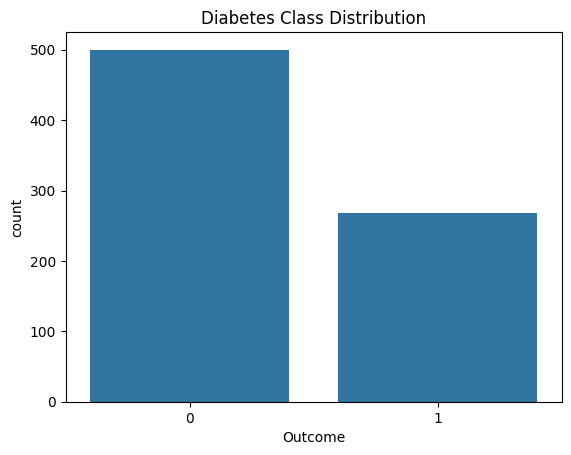

In [9]:
sns.countplot(x='Outcome', data=df)
plt.title('Diabetes Class Distribution')
plt.show()


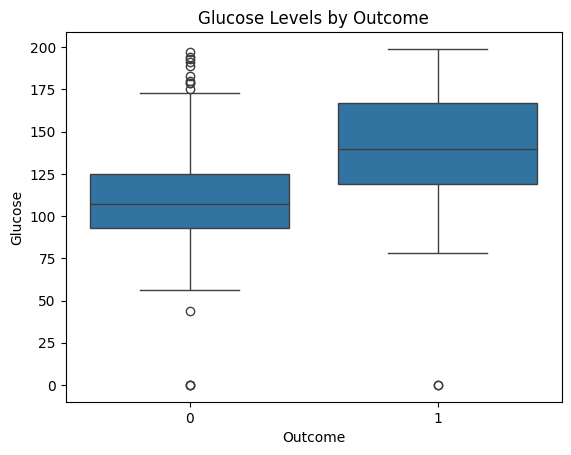

In [10]:
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels by Outcome')
plt.show()


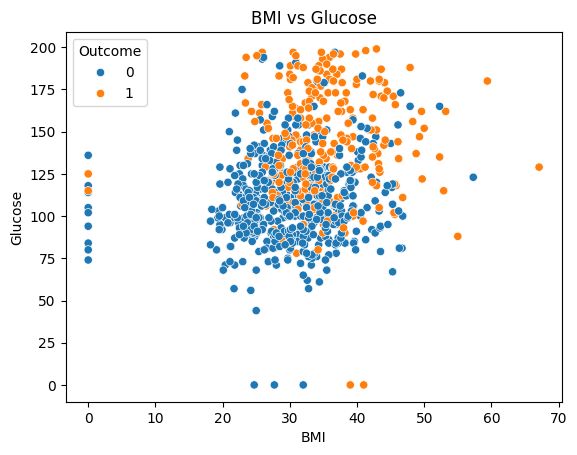

In [11]:
sns.scatterplot(x='BMI', y='Glucose', hue='Outcome', data=df)
plt.title('BMI vs Glucose')
plt.show()


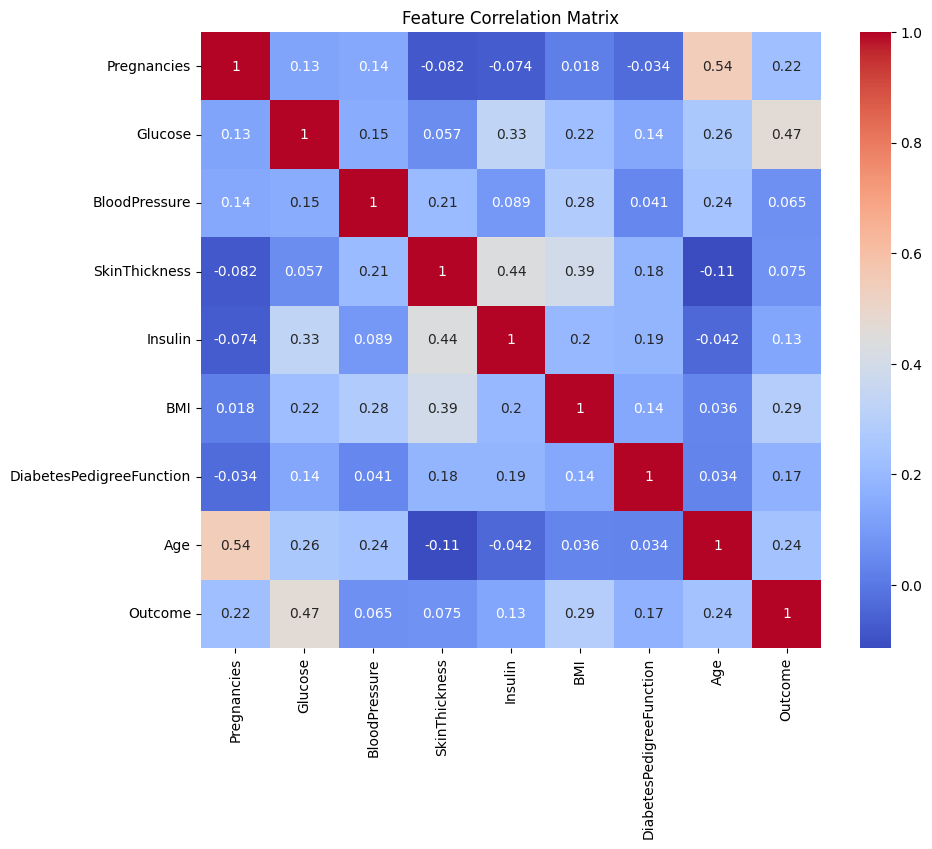

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
# logistic regression

In [17]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)


In [18]:
print("Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))


Logistic Regression Results
[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

ROC-AUC: 0.7353535353535354


In [ ]:
# Random Forest with GridSearchCV

In [19]:
rf = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [4, 6, 8]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)


In [20]:
print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Best Params:", rf_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


Random Forest Results
[[80 19]
 [20 35]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80        99
           1       0.65      0.64      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

Best Params: {'max_depth': 8, 'n_estimators': 100}
ROC-AUC: 0.7222222222222221


In [ ]:
# SVM

In [21]:
svm = SVC(probability=True)
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)


In [22]:
print("SVM Results")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
print("Best Params:", svm_grid.best_params_)
print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))


SVM Results
[[81 18]
 [24 31]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79        99
           1       0.63      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154

Best Params: {'C': 1, 'kernel': 'rbf'}
ROC-AUC: 0.6909090909090908


In [23]:
def predict_diabetes(input_data, model, scaler):
    input_array = np.array(input_data).reshape(1, -1)
    input_scaled = scaler.transform(input_array)
    prediction = model.predict(input_scaled)
    return "Diabetic" if prediction[0] == 1 else "Non-Diabetic"


In [24]:
new_patient = [5, 116, 74, 0, 0, 25.6, 0.201, 30]
result = predict_diabetes(new_patient, rf_grid.best_estimator_, scaler)
print("Prediction for new patient:", result)


Prediction for new patient: Non-Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


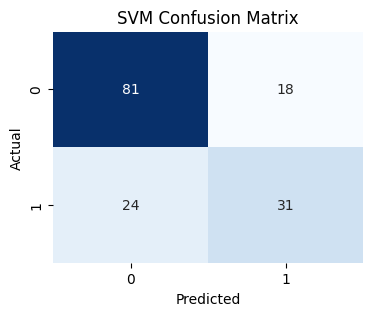

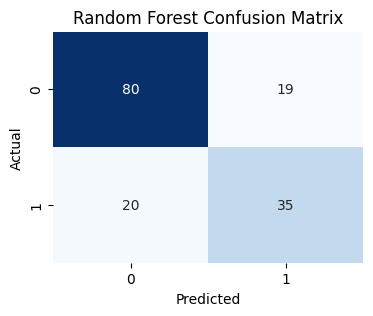

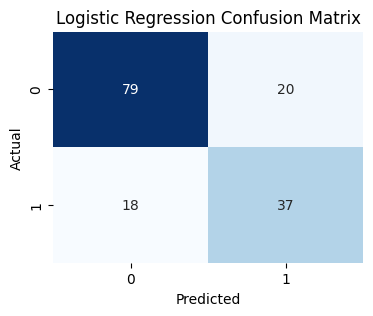

In [25]:
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, svm_grid.predict(X_test), "SVM Confusion Matrix")
plot_conf_matrix(y_test, rf_grid.predict(X_test), "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, log_reg.predict(X_test), "Logistic Regression Confusion Matrix")

In [ ]:
# Comparison of Models (Logistic Regression, Random Forest, SVM)

# ## 1. Logistic Regression
# - **Idea**: A linear model that tries to draw a straight line (or hyperplane) separating diabetic vs. non-diabetic patients.
# - **Pros**:
#   - Simple and highly interpretable (shows which features like Glucose or BMI matter most).
#   - Very fast to train and predict.
#   - Works well when the relationship between features and outcome is close to linear.
# - **Cons**:
#   - Struggles with complex, non-linear data.
#   - Sensitive to outliers.

# **Our Results**:
# - Accuracy = 0.75
# - Recall (diabetic class) = 0.67 (best at catching patients).
# - ROC-AUC = 0.74 (best ability to distinguish classes).
# This is the most balanced and effective model in our case.


# ## 2. Random Forest
# - **Idea**: An ensemble of many decision trees working together (majority vote).
# - **Pros**:
#   - Handles complex, non-linear relationships very well.
#   - Less prone to overfitting than a single tree.
#   - Can deal with class imbalance using class weights.
# - **Cons**:
#   - Slower than Logistic Regression (though still faster than SVM on large datasets).
#   - Less interpretable (harder to pinpoint exact feature influence).

# **Our Results**:
# - Accuracy = 0.75
# - Recall (diabetic class) = 0.64
# - ROC-AUC = 0.72
# Good and balanced, but slightly weaker than Logistic Regression in detecting diabetic patients.


# ## 3. Support Vector Machine (SVM)
# - Idea: Finds the optimal boundary (hyperplane) between classes, defined by the “support vectors.”
# - Pros:
#   - Very powerful in high-dimensional feature spaces.
#   - With kernels (RBF, Polynomial, etc.), can handle non-linear data well.
# - Cons:
#   - Very slow on larger datasets.
#   - Performance heavily depends on kernel choice and parameter tuning.
#   - Probability outputs are not always reliable.

# Our Results:
# - Accuracy = 0.73
# - Recall (diabetic class) = 0.56 (weakest in catching patients).
# - ROC-AUC = 0.69
# Overall weaker than the others in this dataset, especially for identifying diabetic patients.


# ## Conclusion
# - Best model here: Logistic Regression, because it achieved the highest Recall for diabetic patients and the best ROC-AUC.
# - Random Forest: A strong alternative, more flexible if the dataset grows or becomes more complex.
# - SVM: Performed the weakest here but might improve with different data or better hyperparameter tuning.

# In medical problems like diabetes prediction, Recall for the diabetic class is more important than overall Accuracy — missing patients is riskier than misclassifying healthy ones.
